# 3️⃣ Clustering Analysis: Automated Model Selection
Clustering is the most common form of **Unsupervised Learning**. In this notebook, we explore multiple algorithms, analyze them using professional evaluation tools, and select the best one for our customer segmentation.

## Key Learning Objectives:
1. **Model Exploration**: Using `models()` to see all available clustering algorithms.
2. **Interactive Evaluation**: Deep-dive into model performance with `evaluate_model`.
3. **Automated Workflow**: Finding and finalizing the best performing clustering model.

In [ ]:
%%capture
# !pip install pycaret

In [2]:
import pandas as pd
from pycaret.clustering import *
import os

# Create Output folder
output_dir = './Output'
if not os.path.exists(output_dir): os.makedirs(output_dir)

## 1. Initializing the Experiment
The `setup()` function prepares the data by handling normalization and ignoring unnecessary columns. 
After setup, we use `models()` to see what algorithms are available (K-Means, DBSCAN, Hierarchical, etc.).

In [3]:
# Load Mall Customers data
df_mall = pd.read_csv('./Data/Mall_Customers.csv')

# Initialize setup
clu_setup = setup(data=df_mall, ignore_features=['CustomerID'], session_id=123, verbose=False)

# Display all available clustering models
all_models = models()
print("--- Available Clustering Algorithms ---")
all_models

--- Available Clustering Algorithms ---


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


## 2. Model Creation and Selection
In Clustering, unlike Classification, we don't have a `compare_models()` that ranks by Accuracy. Instead, we use `create_model()` for specific algorithms and evaluate them. 

**Pro-Tip**: Usually, **K-Means** or **Hierarchical (hclust)** are the best starting points for structured data like this.

In [4]:
# Create a K-Means model (Standard choice)
kmeans = create_model('kmeans', num_clusters=5)

# Create a Hierarchical model (To compare)
hclust = create_model('hclust', num_clusters=5)

# Use evaluate_model to see a professional dashboard of 'hclust'
# You can view the Dendrogram, Silhouette, and PCA plots here!
evaluate_model(hclust)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4258,141.0630,0.8688,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4400,147.5797,0.8220,0,0,0


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## 3. Metrics and Plotting
After creating a model, we can use `pull()` to get the metrics (Silhouette, Calinski-Harabasz, etc.) and `plot_model()` for visualization.

--- Model Performance Metrics ---
   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0        0.44           147.5797           0.822            0           0   

   Completeness  
0             0  


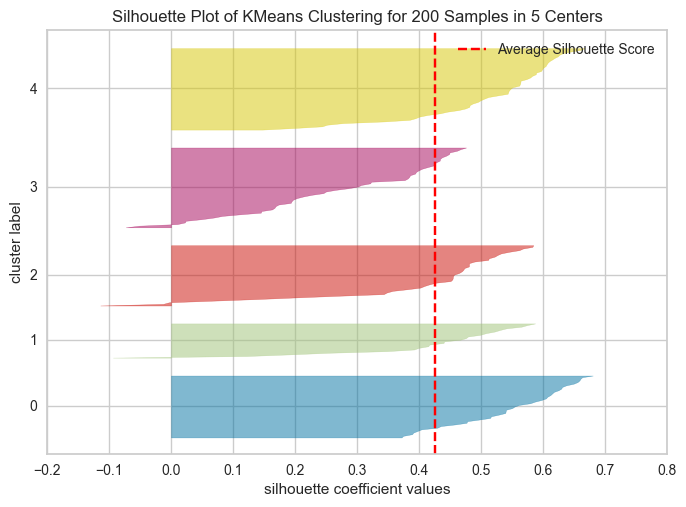

In [5]:
# Get the metrics for the last created model (hclust)
metrics = pull()
print("--- Model Performance Metrics ---")
print(metrics)

# Silhouette Plot: To see how well-separated our clusters are
# Note: If it fails for hclust, use it for kmeans
plot_model(kmeans, plot='silhouette')

# Cluster Plot: 2D visualization using PCA
plot_model(kmeans, plot='cluster')

In [6]:
# t-SNE plot
plot_model(kmeans, plot='tsne')

## 4. Saving the Model
In PyCaret's Clustering module, there is no `finalize_model` function. This is because clustering is an unsupervised task that is performed on the entire dataset provided during the `setup()` phase. Therefore, the model created by `create_model()` is already considered the "final" model.

In [7]:
# In Clustering, we don't need finalize_model. 
# The 'kmeans' object is already our final model.

# Save the model directly
save_model(kmeans, './Output/clustering_mall_customers_model')

print("✅ Model saved successfully without needing finalize_model!")

Transformation Pipeline and Model Successfully Saved
✅ Model saved successfully without needing finalize_model!


## 5. Predicting on New Data
Now we load the model and apply it to new customer data. This ensures our pipeline (Normalization + K-Means) is working.

In [8]:
# Load the saved model
loaded_model = load_model('./Output/clustering_mall_customers_model')

# Prepare new data
new_customers = pd.read_csv('./Data/Mall_Customers.csv').head(5)

# Assign clusters
predictions = predict_model(loaded_model, data=new_customers)

print("\n--- New Customer Assignments ---")
predictions[['Age', 'Annual Income (k$)', 'Cluster']]

Transformation Pipeline and Model Successfully Loaded

--- New Customer Assignments ---


,Age,Annual Income (k$),Cluster
0,19,15,Cluster 1
1,21,15,Cluster 3
2,20,16,Cluster 1
3,23,16,Cluster 3
4,31,17,Cluster 1
